# Imports

In [ ]:
import xarray as xr
import numpy as np
import math

import cartopy
import cartopy.feature as cfeature
import cartopy.crs as ccrs

import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as plb
import matplotlib.image as imag
import matplotlib.ticker as mticker
import matplotlib.transforms as mtrans
from matplotlib.ticker import NullFormatter
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from matplotlib.ticker import MaxNLocator

import pickle

import warnings

In [ ]:
fz = 12
lw = 4
siz = 100

plt.rc('text', usetex=False)
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'
plt.rc('font', family='serif', size=fz)
mpl.rcParams['lines.linewidth'] = lw

# Correlations vs PC algorithm

## From experiments [082]

In [9]:
pathPKL = '/DFS-L/DATA/pritchard/tbeucler/SPCAM/SPCAM_PHYS/PKL_DATA/'

In [10]:
save_name = 'PKL_DATA2022_01_16_lon0_BF'
hf = open(pathPKL+save_name+'.pkl','rb')

In [17]:
Nlat = 64
Nlon = 128
Ninp0 = 94 # without tendencies at t-dt
Noup = 65
Ninp = Ninp0+Noup
Nvars = Ninp+Noup
N_toexclude = 2 # Exclude upper atmospheric PHQ as inputs because zero

In [18]:
data = pickle.load(hf)

EOFError: Ran out of input

In [19]:
corr_array = np.zeros((Noup-N_toexclude,Ninp-N_toexclude))
#link_array = np.zeros((Noup-N_toexclude,Ninp-N_toexclude))
link_latbylat = np.zeros((Noup-N_toexclude,Ninp-N_toexclude))
for ioup in range(Noup-N_toexclude):
    ioup0 = Ninp0+N_toexclude+ioup
    #links = np.array([i[0] for i in par_raw_lon0_concat[ioup0]])
    corr_array[ioup,:] = data['corr_lon0'][ioup]
    #link_array[ioup,links] = 1
    for iinp in range(Ninp-N_toexclude):
        link_latbylat[ioup,iinp] = data['par_raw_lon0_intersect'][ioup0][iinp]

In [21]:
corr_array.shape

(63, 157)

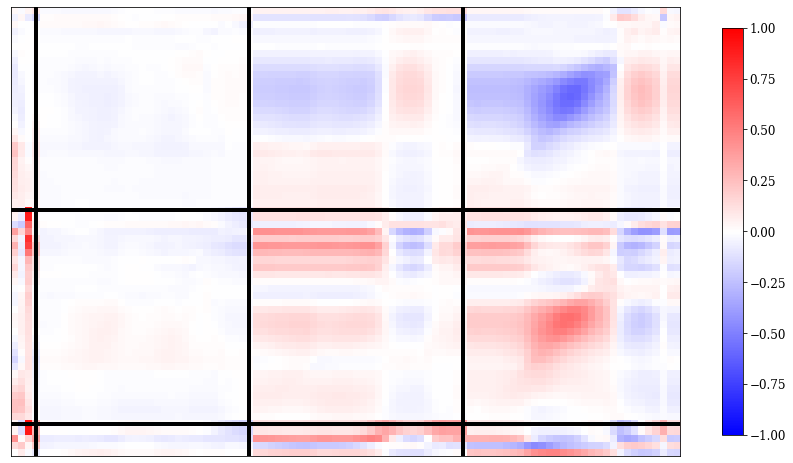

In [41]:
plt.figure(figsize=(15,15))

plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.yticks([])

plt.imshow(corr_array[:,:94],cmap='bwr',vmin=-1,vmax=1)
for iy,y0 in enumerate([28,58]):
    plt.axhline(y=y0,color='k')
for ix,x0 in enumerate([30,60,90]):
    plt.axvline(x=x0,color='k')

plt.gca().invert_xaxis()
plt.colorbar(shrink=0.5)

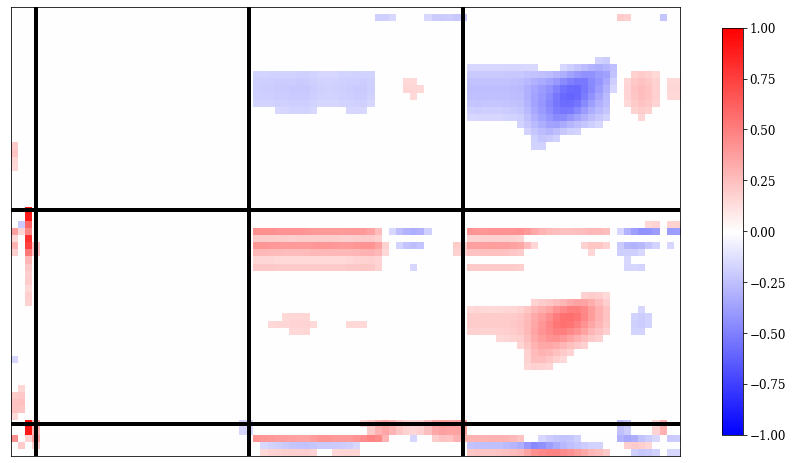

In [44]:
prop = 15

plt.figure(figsize=(15,15))
mask = np.abs(corr_array)>prop/100
plt.imshow((corr_array*mask)[:,:94],cmap='bwr',vmin=-1,vmax=1)

plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.yticks([])

for iy,y0 in enumerate([28,58]):
    plt.axhline(y=y0,color='k')
for ix,x0 in enumerate([30,60,90]):
    plt.axvline(x=x0,color='k')

plt.gca().invert_xaxis()
plt.colorbar(shrink=0.5)

https://stackoverflow.com/questions/67605719/displaying-lowest-values-as-white

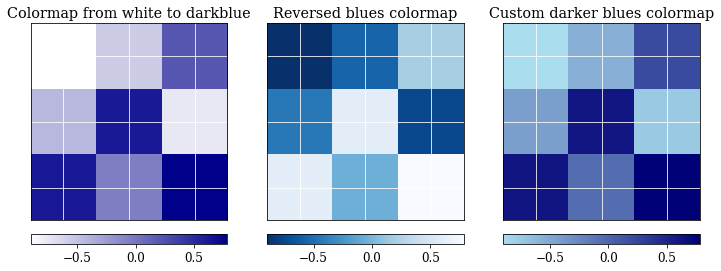

In [52]:
from matplotlib.colors import LinearSegmentedColormap
img = np.array([[-0.9, -0.5599234, 0.21042876], [-0.42735877, 0.61514954, -0.74305015], [0.61958201, -0.04358633, 0.78672511]])

fig, axs = plt.subplots(ncols=3, figsize=(12, 5))

cmap0 = LinearSegmentedColormap.from_list('', ['white', 'darkblue'])
cmap1 = 'Blues_r'
cmap2 = LinearSegmentedColormap.from_list('', ['#aaddee', '#000077'])

for ax, cmap in zip(axs, [cmap0, cmap1, cmap2]):
    im = ax.imshow(img, origin='upper', cmap=cmap)
    plt.colorbar(im, ax=ax, orientation='horizontal', pad=0.05)
    ax.set_xticks([0, 1, 2])
    ax.set_yticks([0, 1, 2])
    ax.tick_params(labelbottom=False, labelleft=False, length=0)  # hide ticks, but use position for a grid
    ax.grid(True, color='white')

axs[0].set_title("Colormap from white to darkblue")
axs[1].set_title("Reversed blues colormap")
axs[2].set_title("Custom darker blues colormap")
plt.show()

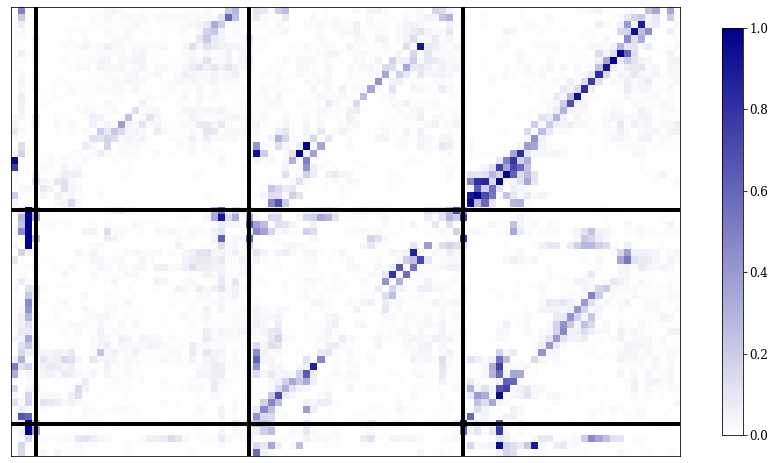

In [53]:
plt.figure(figsize=(15,15))

plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.yticks([])

plt.imshow(link_latbylat[:,:94],cmap=cmap0,vmin=0,vmax=1)
for iy,y0 in enumerate([28,58]):
    plt.axhline(y=y0,color='k')
for ix,x0 in enumerate([30,60,90]):
    plt.axvline(x=x0,color='k')

plt.gca().invert_xaxis()
plt.colorbar(shrink=0.5)

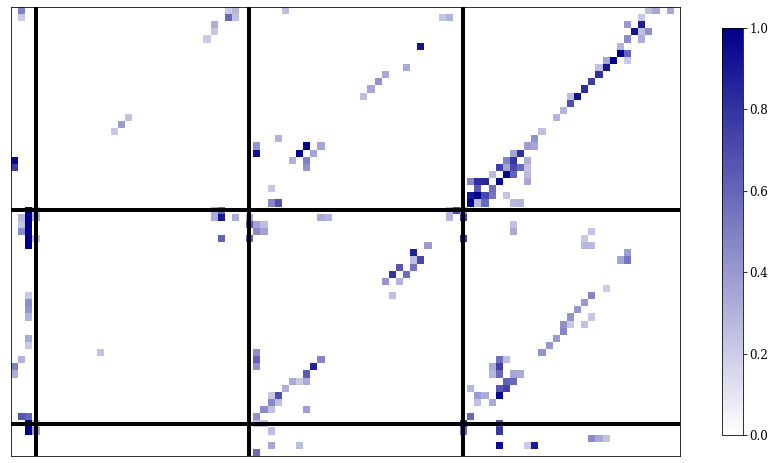

In [54]:
prop = 20

plt.figure(figsize=(15,15))
mask = link_latbylat>prop/100
plt.imshow((link_latbylat*mask)[:,:94],cmap=cmap0,vmin=0,vmax=1)

plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.yticks([])

for iy,y0 in enumerate([28,58]):
    plt.axhline(y=y0,color='k')
for ix,x0 in enumerate([30,60,90]):
    plt.axvline(x=x0,color='k')

plt.gca().invert_xaxis()
plt.colorbar(shrink=0.5)

## Load from Nando

In [112]:
path_folder = '/DFS-L/DATA/pritchard/tbeucler/SPCAM/Nando/'

In [113]:
path_singlepoint = path_folder + 'Nandolinks_singlepoint'
path_allpoints = path_folder + 'Nandolinks_all_lonlats'

In [116]:
hf = open(path_singlepoint,'rb')
singlepoint = pickle.load(hf)
hf.close()

In [117]:
hf = open(path_allpoints,'rb')
allpoints = pickle.load(hf)
hf.close()

In [119]:
allpoints.keys()

dict_keys(['tphystnd-3.64', 'tphystnd-7.59', 'tphystnd-14.36', 'tphystnd-24.61', 'tphystnd-38.27', 'tphystnd-54.6', 'tphystnd-72.01', 'tphystnd-87.82', 'tphystnd-103.32', 'tphystnd-121.55', 'tphystnd-142.99', 'tphystnd-168.23', 'tphystnd-197.91', 'tphystnd-232.83', 'tphystnd-273.91', 'tphystnd-322.24', 'tphystnd-379.1', 'tphystnd-445.99', 'tphystnd-524.69', 'tphystnd-609.78', 'tphystnd-691.39', 'tphystnd-763.4', 'tphystnd-820.86', 'tphystnd-859.53', 'tphystnd-887.02', 'tphystnd-912.64', 'tphystnd-936.2', 'tphystnd-957.49', 'tphystnd-976.33', 'tphystnd-992.56', 'phq-3.64', 'phq-7.59', 'phq-14.36', 'phq-24.61', 'phq-38.27', 'phq-54.6', 'phq-72.01', 'phq-87.82', 'phq-103.32', 'phq-121.55', 'phq-142.99', 'phq-168.23', 'phq-197.91', 'phq-232.83', 'phq-273.91', 'phq-322.24', 'phq-379.1', 'phq-445.99', 'phq-524.69', 'phq-609.78', 'phq-691.39', 'phq-763.4', 'phq-820.86', 'phq-859.53', 'phq-887.02', 'phq-912.64', 'phq-936.2', 'phq-957.49', 'phq-976.33', 'phq-992.56', 'fsnt', 'fsns', 'flnt', 'fl

In [121]:
allpoints['tphystnd-3.64'].keys()

dict_keys(['0.01'])

In [127]:
allpoints['var_names_parents']

['tbp-3.64',
 'tbp-7.59',
 'tbp-14.36',
 'tbp-24.61',
 'tbp-38.27',
 'tbp-54.6',
 'tbp-72.01',
 'tbp-87.82',
 'tbp-103.32',
 'tbp-121.55',
 'tbp-142.99',
 'tbp-168.23',
 'tbp-197.91',
 'tbp-232.83',
 'tbp-273.91',
 'tbp-322.24',
 'tbp-379.1',
 'tbp-445.99',
 'tbp-524.69',
 'tbp-609.78',
 'tbp-691.39',
 'tbp-763.4',
 'tbp-820.86',
 'tbp-859.53',
 'tbp-887.02',
 'tbp-912.64',
 'tbp-936.2',
 'tbp-957.49',
 'tbp-976.33',
 'tbp-992.56',
 'qbp-3.64',
 'qbp-7.59',
 'qbp-14.36',
 'qbp-24.61',
 'qbp-38.27',
 'qbp-54.6',
 'qbp-72.01',
 'qbp-87.82',
 'qbp-103.32',
 'qbp-121.55',
 'qbp-142.99',
 'qbp-168.23',
 'qbp-197.91',
 'qbp-232.83',
 'qbp-273.91',
 'qbp-322.24',
 'qbp-379.1',
 'qbp-445.99',
 'qbp-524.69',
 'qbp-609.78',
 'qbp-691.39',
 'qbp-763.4',
 'qbp-820.86',
 'qbp-859.53',
 'qbp-887.02',
 'qbp-912.64',
 'qbp-936.2',
 'qbp-957.49',
 'qbp-976.33',
 'qbp-992.56',
 'vbp-3.64',
 'vbp-7.59',
 'vbp-14.36',
 'vbp-24.61',
 'vbp-38.27',
 'vbp-54.6',
 'vbp-72.01',
 'vbp-87.82',
 'vbp-103.32',
 'vb

In [123]:
allpoints['tphystnd-3.64']['0.01'].keys()

dict_keys(['parents', 'num_parents', 'per_parents', 'val_matrix', 'parents_percent', 'var_names'])

In [125]:
allpoints['tphystnd-3.64']['0.01']['parents_percent'].shape

(95,)

In [128]:
out_dic = ['tphystnd-3.64', 'tphystnd-7.59', 'tphystnd-14.36', 'tphystnd-24.61', 
           'tphystnd-38.27', 'tphystnd-54.6', 'tphystnd-72.01', 'tphystnd-87.82', 
           'tphystnd-103.32', 'tphystnd-121.55', 'tphystnd-142.99', 'tphystnd-168.23', 
           'tphystnd-197.91', 'tphystnd-232.83', 'tphystnd-273.91', 'tphystnd-322.24', 
           'tphystnd-379.1', 'tphystnd-445.99', 'tphystnd-524.69', 'tphystnd-609.78', 
           'tphystnd-691.39', 'tphystnd-763.4', 'tphystnd-820.86', 'tphystnd-859.53', 
           'tphystnd-887.02', 'tphystnd-912.64', 'tphystnd-936.2', 'tphystnd-957.49', 
           'tphystnd-976.33', 'tphystnd-992.56',
           'phq-3.64', 'phq-7.59', 'phq-14.36', 'phq-24.61', 'phq-38.27', 
           'phq-54.6', 'phq-72.01', 'phq-87.82', 'phq-103.32', 'phq-121.55', 
           'phq-142.99', 'phq-168.23', 'phq-197.91', 'phq-232.83', 'phq-273.91', 
           'phq-322.24', 'phq-379.1', 'phq-445.99', 'phq-524.69', 'phq-609.78', 
           'phq-691.39', 'phq-763.4', 'phq-820.86', 'phq-859.53', 'phq-887.02', 
           'phq-912.64', 'phq-936.2', 'phq-957.49', 'phq-976.33', 'phq-992.56',
          'fsnt', 'fsns', 'flnt', 'flns', 'prect']

In [148]:
link_Nando = np.zeros((65,94))
link_single = np.zeros((65,94))
for ioup in range(65):
    for iinp in range(94):
        link_Nando[ioup,iinp] = allpoints[out_dic[ioup]]['0.01']['parents_percent'][iinp]
        link_single[ioup,iinp] = singlepoint[out_dic[ioup]]['0.01']['parents_percent'][iinp]

In [149]:
corr_array.shape

(63, 157)

In [151]:
corr_nando = np.zeros((65,94))
for iinp in range(94):
    if iinp<30: corr_target = corr_array[:,30+iinp]
    elif iinp<60: corr_target = corr_array[:,iinp-30]
    else: corr_target = corr_array[:,iinp]
    for ioup in range(65):
        if ioup<2: corr_nando[ioup,iinp] = 0
        elif ioup<30: corr_nando[ioup,iinp] = corr_target[30+ioup-2]
        elif ioup<60: corr_nando[ioup,iinp] = corr_target[ioup-30-2]
        else: corr_nando[ioup,iinp] = corr_target[ioup-2]

## Plot from Nando

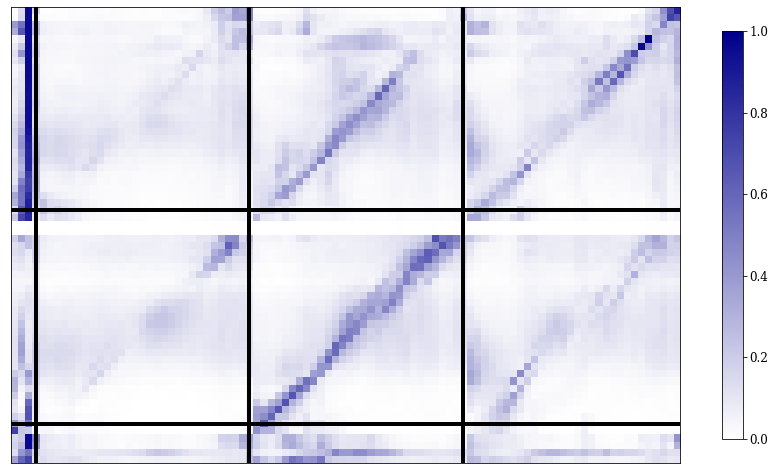

In [138]:
plt.figure(figsize=(15,15))

plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.yticks([])

plt.imshow(link_Nando,cmap=cmap0,vmin=0,vmax=1)
for iy,y0 in enumerate([28,58]):
    plt.axhline(y=y0,color='k')
for ix,x0 in enumerate([30,60,90]):
    plt.axvline(x=x0,color='k')

plt.gca().invert_xaxis()
plt.colorbar(shrink=0.5)

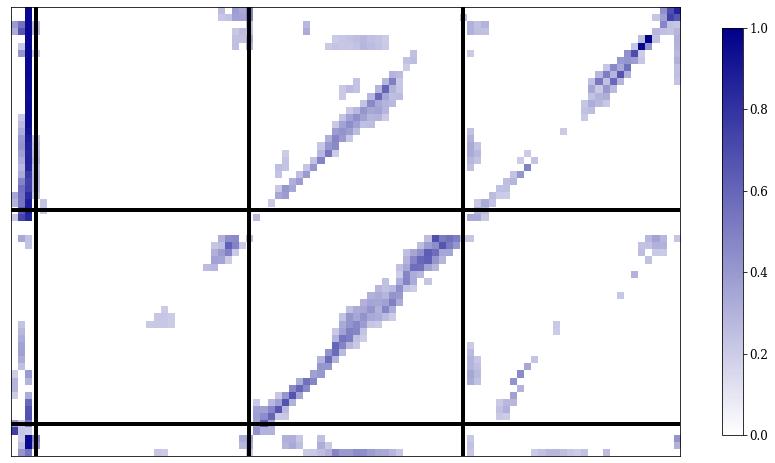

In [141]:
prop = 20

plt.figure(figsize=(15,15))
mask = link_latbylat>prop/100
plt.imshow((link_latbylat*mask)[:,:94],cmap=cmap0,vmin=0,vmax=1)

plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.yticks([])

for iy,y0 in enumerate([28,58]):
    plt.axhline(y=y0,color='k')
for ix,x0 in enumerate([30,60,90]):
    plt.axvline(x=x0,color='k')

plt.gca().invert_xaxis()
plt.colorbar(shrink=0.5)

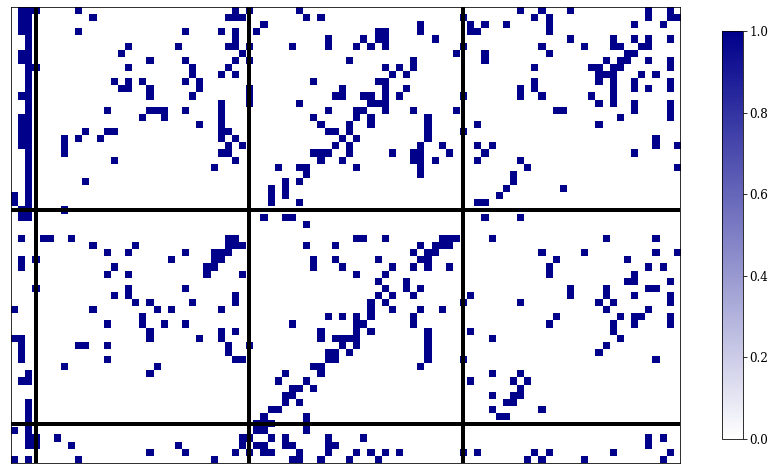

In [143]:
plt.figure(figsize=(15,15))

plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.yticks([])

plt.imshow(link_single,cmap=cmap0,vmin=0,vmax=1)
for iy,y0 in enumerate([28,58]):
    plt.axhline(y=y0,color='k')
for ix,x0 in enumerate([30,60,90]):
    plt.axvline(x=x0,color='k')

plt.gca().invert_xaxis()
plt.colorbar(shrink=0.5)

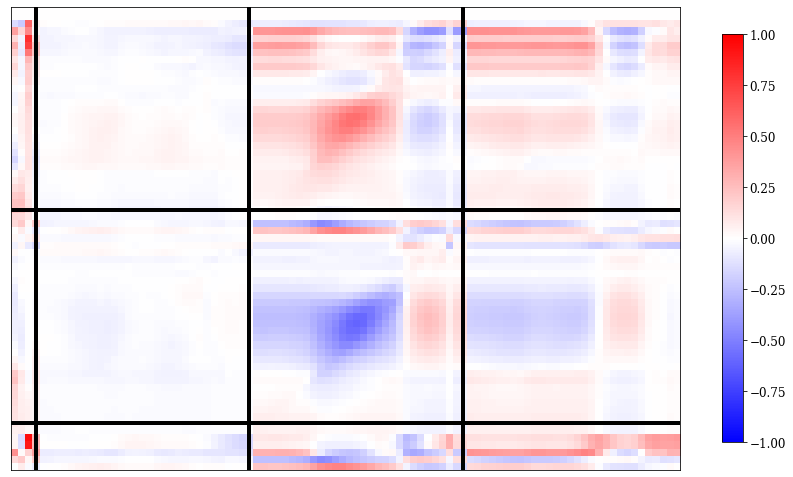

In [152]:
plt.figure(figsize=(15,15))

plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.yticks([])

plt.imshow(corr_nando,cmap='bwr',vmin=-1,vmax=1)
for iy,y0 in enumerate([28,58]):
    plt.axhline(y=y0,color='k')
for ix,x0 in enumerate([30,60,90]):
    plt.axvline(x=x0,color='k')

plt.gca().invert_xaxis()
plt.colorbar(shrink=0.5)

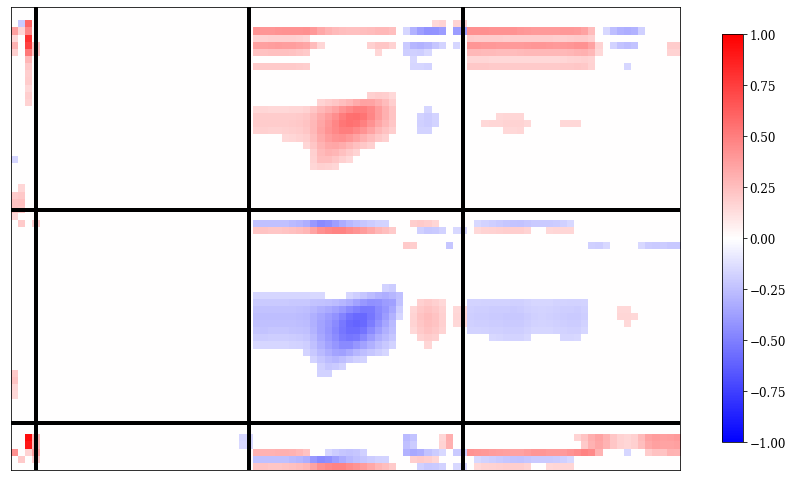

In [153]:
prop = 15

plt.figure(figsize=(15,15))
mask = np.abs(corr_nando)>prop/100
plt.imshow((corr_nando*mask)[:,:94],cmap='bwr',vmin=-1,vmax=1)

plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.yticks([])

for iy,y0 in enumerate([28,58]):
    plt.axhline(y=y0,color='k')
for ix,x0 in enumerate([30,60,90]):
    plt.axvline(x=x0,color='k')

plt.gca().invert_xaxis()
plt.colorbar(shrink=0.5)

# R2 maps

## Load data

In [59]:
path_PKL = '/export/home/tbeucler/CBRAIN-CAM/notebooks/tbeucler_devlog/PKL_DATA'

In [61]:
save_name = '2022_01_21_MSE_TPHYSTND500'
hf = open(path_PKL+save_name+'.pkl','rb')
MSE = pickle.load(hf)

In [62]:
MSE

{'MSEtrain_m4K': {'BF': 399.5276383858502,
  'CI': 482.06637199654887,
  'BF_CC': 438.31242733064636,
  'CI_CC': 634.1151104499987,
  'BF_Corr': 765.6201407155512},
 'MSEvalid_m4K': {'BF': 399.7909591108707,
  'CI': 490.8960188410554,
  'BF_CC': 437.17802075582017,
  'CI_CC': 632.7811565499336,
  'BF_Corr': 803.4721369962258},
 'MSEtrain_p4K': {'BF': 22716.870782416652,
  'CI': 1580.8284817573242,
  'BF_CC': 5816.437580037767,
  'CI_CC': 1435.4670409096427,
  'BF_Corr': 24249.16651213047},
 'MSEvalid_p4K': {'BF': 22856.130908012874,
  'CI': 1757.905200046421,
  'BF_CC': 5713.883775290041,
  'CI_CC': 1471.16131784115,
  'BF_Corr': 24338.72495811187}}

In [63]:
save_name = '2022_01_22_R2_TPHYSTND500'
hf = open(path_PKL+save_name+'.pkl','rb')
R2 = pickle.load(hf)

In [71]:
R2.keys()

dict_keys(['r2_map', 'r2_map_p4K'])

In [65]:
save_name = '2022_01_23_MSE_TPHYSTND500_RG'
hf = open(path_PKL+save_name+'.pkl','rb')
MSE_RG = pickle.load(hf)

In [67]:
save_name = '2022_01_23_R2_TPHYSTND500_RG'
hf = open(path_PKL+save_name+'.pkl','rb')
R2_RG = pickle.load(hf)

Coordinates

In [70]:
pathPKL = '/export/home/tbeucler/CBRAIN-CAM/notebooks/tbeucler_devlog/PKL_DATA'
path_folder = '/DFS-L/DATA/pritchard/tbeucler/SPCAM/'
pathAQ_0K = path_folder + 'fluxbypass_aqua/AndKua_aqua_SPCAM3.0_sp_fbp_f4.cam2.h1.00'
coor = xr.open_dataset(pathAQ_0K+'00-03-01-00000.nc')

path_folRG = '/DFS-L/DATA/pritchard/liranp/To_Tom/Output/'
path_RG0K = path_folRG + 'SST_0001Kp_Neuralnet_SPCAM_all_216/atm/hist/SST_0001Kp_Neuralnet_SPCAM_all_216.cam.h1.2013-'
path_RG0K = path_RG0K + '05-05-*.nc'

coor_RG = xr.open_mfdataset(path_RG0K,decode_cf=False)
latRG = coor_RG.lat; lonRG = coor_RG.lon; levRG = coor_RG.lev;
coor_RG.close();

/DFS-L/DATA/pritchard/tbeucler/Miniconda3_2021_04_12/miniconda3/envs/CbrainCustomLayer/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  # Remove the CWD from sys.path while we load stuff.
/DFS-L/DATA/pritchard/tbeucler/Miniconda3_2021_04_12/miniconda3/envs/CbrainCustomLayer/lib/python3.6/site-packages/xarray/backends/api.py:941: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in future, please use the new
`combine_nested` function (or the `co

## Plot maps

In [72]:
R2['r2_map'].keys()

dict_keys(['BF', 'CI', 'BF_CC', 'CI_CC', 'BF_Corr'])

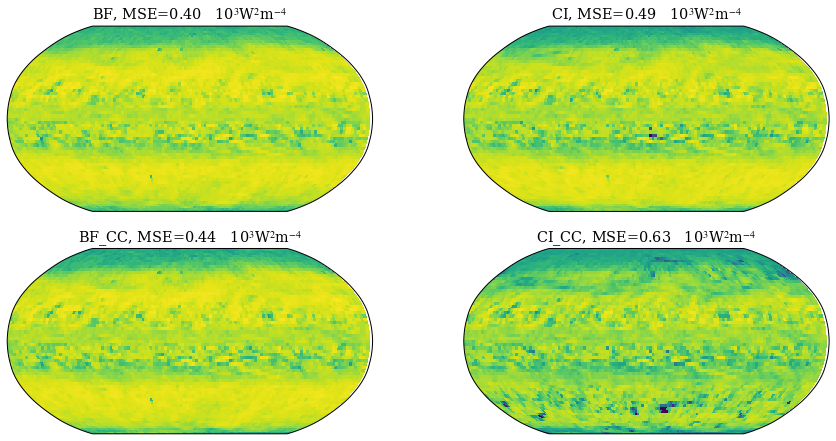

In [96]:
fig, ax = plt.subplots(2,2,subplot_kw={'projection':ccrs.Robinson(central_longitude=180)},figsize=(15,7.5))
for ikey,key in enumerate(['BF', 'CI', 'BF_CC', 'CI_CC']):
    irow = int(ikey/2)
    icol = ikey-2*irow
    imag = ax[irow,icol].pcolormesh(coor.lon,coor.lat,R2['r2_map'][key][1],transform=ccrs.PlateCarree(),vmin=-1,vmax=1)
    ax[irow,icol].set_title(key+', MSE='+'%02.2f'%(MSE['MSEvalid_m4K'][key]/1e3)+'   10$^{3}$W$^{2}$m$^{-4}$')
#plt.colorbar(imag)

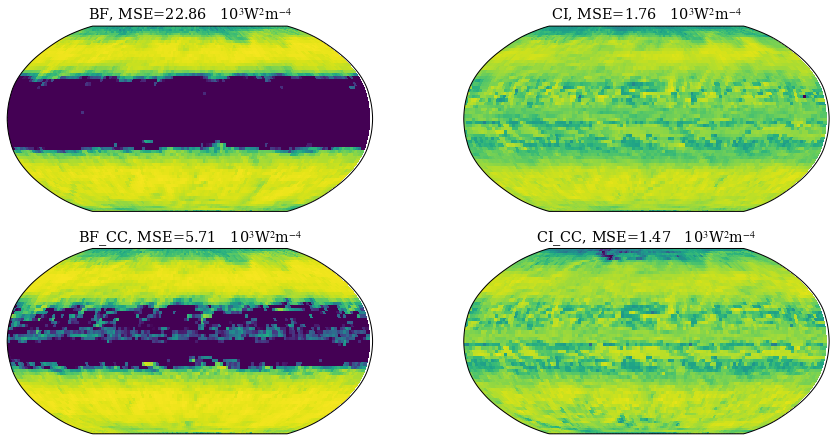

In [97]:
fig, ax = plt.subplots(2,2,subplot_kw={'projection':ccrs.Robinson(central_longitude=180)},figsize=(15,7.5))
for ikey,key in enumerate(['BF', 'CI', 'BF_CC', 'CI_CC']):
    irow = int(ikey/2)
    icol = ikey-2*irow
    imag = ax[irow,icol].pcolormesh(coor.lon,coor.lat,R2['r2_map_p4K'][key][1],transform=ccrs.PlateCarree(),vmin=-1,vmax=1)
    ax[irow,icol].set_title(key+', MSE='+'%02.2f'%(MSE['MSEvalid_p4K'][key]/1e3)+'   10$^{3}$W$^{2}$m$^{-4}$')

In [98]:
R2_RG.keys()

dict_keys(['r2_map_RG'])

In [100]:
MSE_RG.keys()

dict_keys(['MSEtrain_RG', 'MSEvalid_RG'])

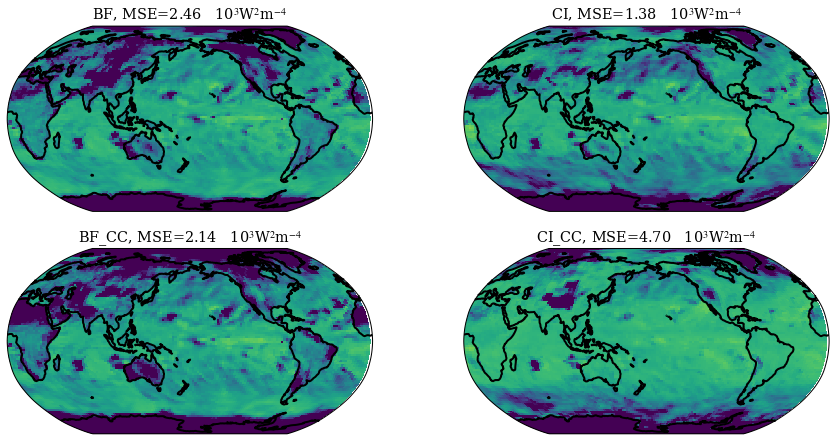

In [103]:
fig, ax = plt.subplots(2,2,subplot_kw={'projection':ccrs.Robinson(central_longitude=180)},figsize=(15,7.5))
for ikey,key in enumerate(['BF', 'CI', 'BF_CC', 'CI_CC']):
    irow = int(ikey/2)
    icol = ikey-2*irow
    imag = ax[irow,icol].pcolormesh(coor_RG.lon,coor_RG.lat,
                                    R2_RG['r2_map_RG'][key][1],transform=ccrs.PlateCarree(),vmin=-2,vmax=1)
    ax[irow,icol].coastlines(linewidth=2.0,edgecolor='0.25')
    ax[irow,icol].set_title(key+', MSE='+'%02.2f'%(MSE_RG['MSEvalid_RG'][key]/1e3)+'   10$^{3}$W$^{2}$m$^{-4}$')

Text(0.5, 1.0, 'BF_Corr, MSE=24.34   10$^{3}$W$^{2}$m$^{-4}$')

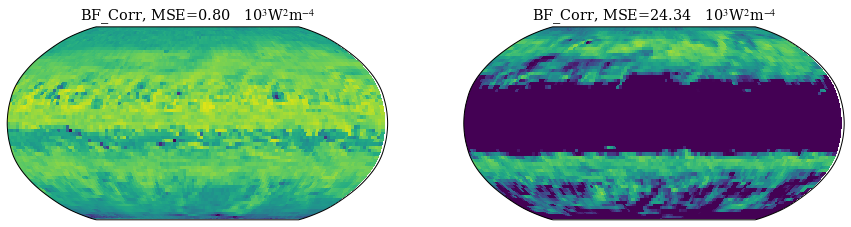

In [105]:
fig, ax = plt.subplots(1,2,subplot_kw={'projection':ccrs.Robinson(central_longitude=180)},figsize=(15,7.5))

key = 'BF_Corr'

imag = ax[0].pcolormesh(coor.lon,coor.lat,R2['r2_map'][key][1],transform=ccrs.PlateCarree(),vmin=-1,vmax=1)
ax[0].set_title(key+', MSE='+'%02.2f'%(MSE['MSEvalid_m4K'][key]/1e3)+'   10$^{3}$W$^{2}$m$^{-4}$')

imag = ax[1].pcolormesh(coor.lon,coor.lat,R2['r2_map_p4K'][key][1],transform=ccrs.PlateCarree(),vmin=-1,vmax=1)
ax[1].set_title(key+', MSE='+'%02.2f'%(MSE['MSEvalid_p4K'][key]/1e3)+'   10$^{3}$W$^{2}$m$^{-4}$')